In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor



In [2]:
df = pd.read_csv(r'C:\Users\tanmi\Downloads\NYPDD.csv')

display(df.head(20))

C:\Users\tanmi\AppData\Local\Temp\ipykernel_15660\2888751862.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\tanmi\Downloads\NYPDD.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [3]:
df.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

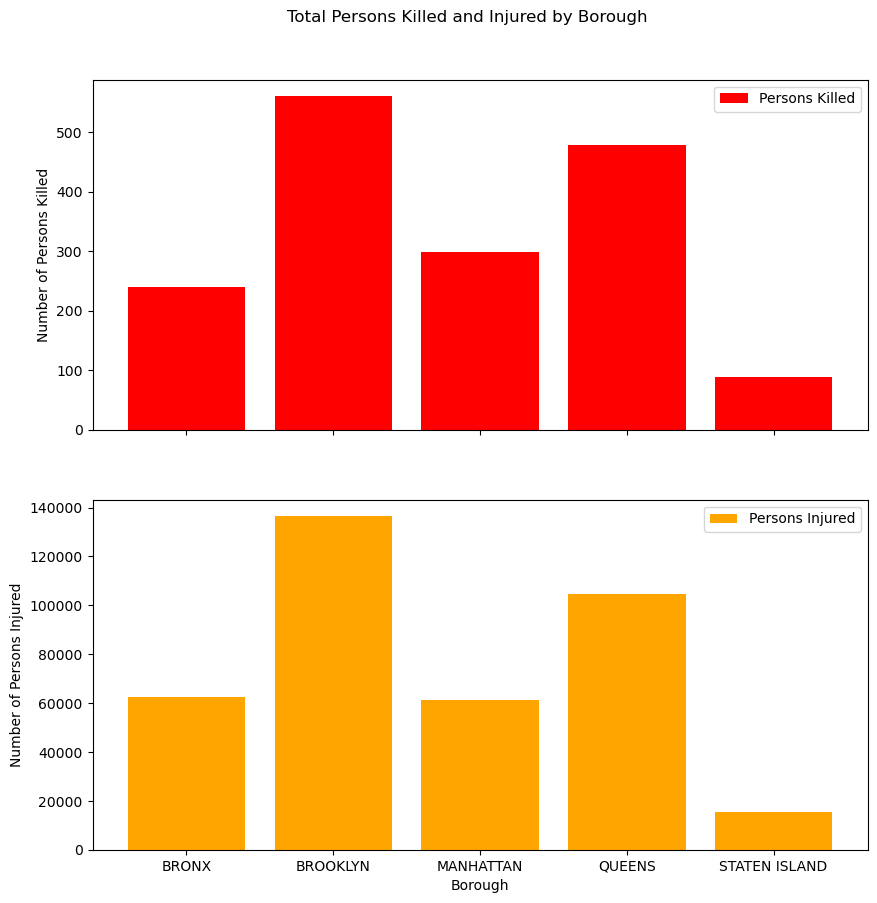

In [5]:
# Group by Borough and suming total killed and injured
Borough_group = df.groupby('BOROUGH').agg({'NUMBER_OF_PERSONS_KILLED': 'sum', 'NUMBER_OF_PERSONS_INJURED': 'sum'})


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

ax2.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

plt.xlabel('Borough')
plt.suptitle('Total Persons Killed and Injured by Borough', y=0.95)
plt.show()

In [6]:
Injured_pcts = Borough_group.NUMBER_OF_PERSONS_INJURED/Borough_group.NUMBER_OF_PERSONS_INJURED.sum()
print("Injured % by borough")
Injured_pcts

Injured % by borough


BOROUGH
BRONX            0.164498
BROOKLYN         0.358702
MANHATTAN        0.160798
QUEENS           0.274954
STATEN ISLAND    0.041048
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

In [7]:
killd_pcts = Borough_group.NUMBER_OF_PERSONS_KILLED/Borough_group.NUMBER_OF_PERSONS_KILLED.sum()
print("Killed % by borough")
killd_pcts

Killed % by borough


BOROUGH
BRONX            0.143544
BROOKLYN         0.336336
MANHATTAN        0.179580
QUEENS           0.287688
STATEN ISLAND    0.052853
Name: NUMBER_OF_PERSONS_KILLED, dtype: float64

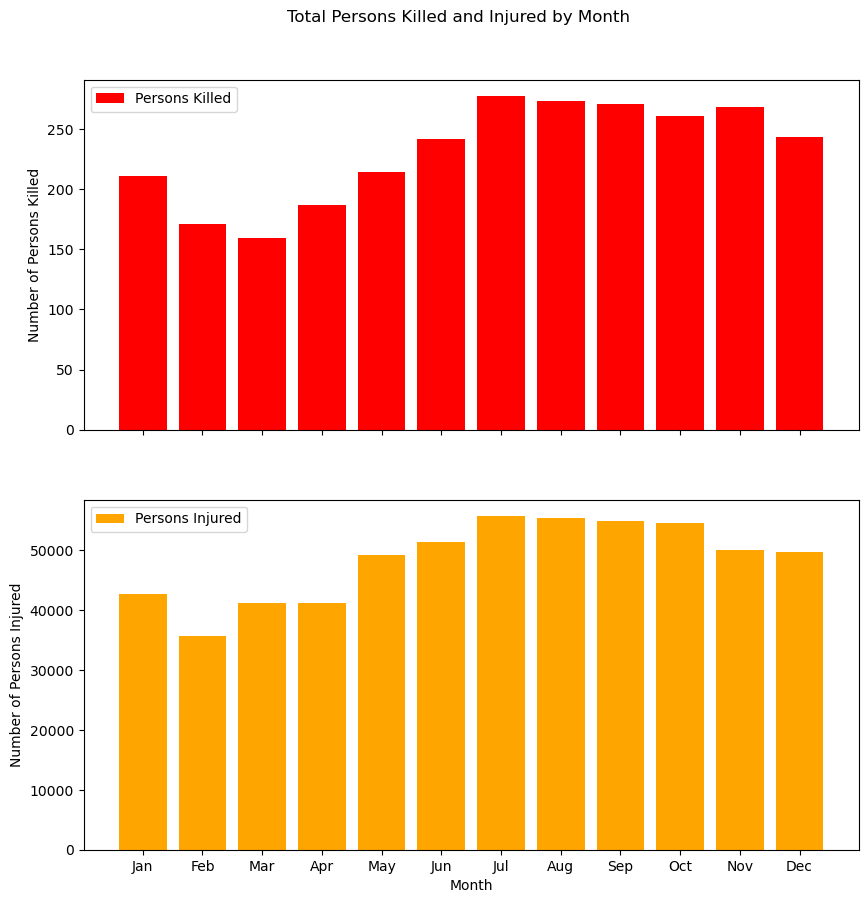

In [8]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
group_month = df.groupby(df['CRASH_DATE'].dt.month).agg({
    'NUMBER_OF_PERSONS_KILLED': 'sum',
    'NUMBER_OF_PERSONS_INJURED': 'sum'
})

# Changing the name of the month number to month name
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
group_month.index = month

# Plotting with two separate bar graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Bar plot for persons killed (red)
ax1.bar(group_month.index, group_month['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

# Bar plot for persons injured (orange)
ax2.bar(group_month.index, group_month['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

# plot parameters
plt.xlabel('Month')
plt.suptitle('Total Persons Killed and Injured by Month', y=0.95)
plt.show()

In [9]:
Injured_per_month = group_month.NUMBER_OF_PERSONS_INJURED/group_month.NUMBER_OF_PERSONS_INJURED.sum()
Injured_per_month

Jan    0.073360
Feb    0.061405
Mar    0.070943
Apr    0.070764
May    0.084639
Jun    0.088356
Jul    0.095663
Aug    0.095074
Sep    0.094323
Oct    0.093879
Nov    0.086036
Dec    0.085558
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

In [10]:
Killed_per_month = group_month.NUMBER_OF_PERSONS_KILLED/group_month.NUMBER_OF_PERSONS_KILLED.sum()
Killed_per_month

Jan    0.075981
Feb    0.061577
Mar    0.057256
Apr    0.067339
May    0.077062
Jun    0.087144
Jul    0.099748
Aug    0.098308
Sep    0.097587
Oct    0.093986
Nov    0.096507
Dec    0.087505
Name: NUMBER_OF_PERSONS_KILLED, dtype: float64

C:\Users\tanmi\AppData\Local\Temp\ipykernel_15660\637250048.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour_of_Day'] = pd.to_datetime(df['CRASH_TIME']).dt.hour


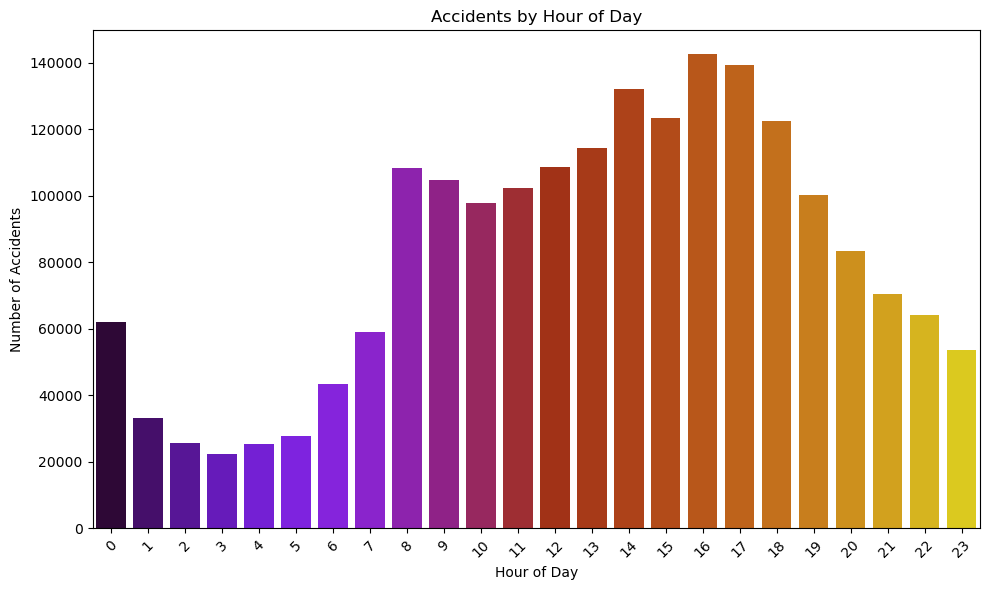

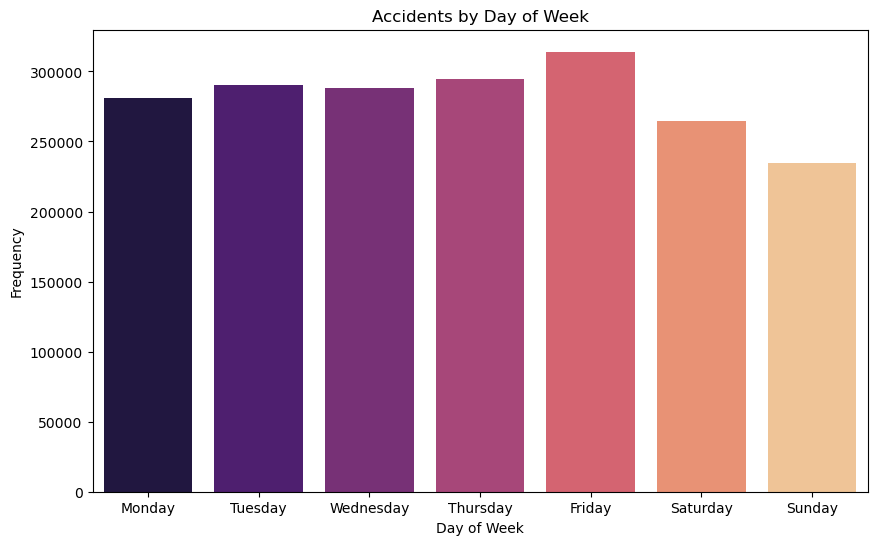

In [11]:
# Extract hour of day from 'CRASH_TIME'
df['day_of_week'] = pd.to_datetime(df['CRASH_DATE']).dt.day_name()
df['Hour_of_Day'] = pd.to_datetime(df['CRASH_TIME']).dt.hour

# Convert 'day_of_week' to categorical type
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

hour_dataset = df[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED', 'Hour_of_Day']].copy()

# Visualize accidents by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_dataset, x='Hour_of_Day', palette='gnuplot')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Accidents by Day of Week')
plt.show()